# 3D Printer DataSet for Mechanical Engineers

Import Data

In [1]:
import pandas as pd
data = pd.read_csv("data.csv")

In [2]:
data.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


Let's multiply these columns by 100 to make them more understandable.

In [4]:
data.layer_height = data.layer_height*100
data.elongation = data.elongation*100

In [5]:
data.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,2.0,8,90,grid,220,60,40,abs,0,25,18,120.0
1,2.0,7,90,honeycomb,225,65,40,abs,25,32,16,140.0
2,2.0,1,80,grid,230,70,40,abs,50,40,8,80.0
3,2.0,4,70,honeycomb,240,75,40,abs,75,68,10,50.0
4,2.0,6,90,grid,250,80,40,abs,100,92,5,70.0


In this data set, ABS and PLA assigned 0 and 1 values for materials.

In [6]:
data.material = [0 if each == "abs" else 1 for each in data.material]
# abs = 0, pla = 1

data.infill_pattern = [0 if each == "grid" else 1 for each in data.infill_pattern]
# grid = 0, honeycomb = 1

In [7]:
data.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,2.0,8,90,0,220,60,40,0,0,25,18,120.0
1,2.0,7,90,1,225,65,40,0,25,32,16,140.0
2,2.0,1,80,0,230,70,40,0,50,40,8,80.0
3,2.0,4,70,1,240,75,40,0,75,68,10,50.0
4,2.0,6,90,0,250,80,40,0,100,92,5,70.0


Seperate Input parameters and Prediction Materials.

In [8]:
y_data = data.material.values
x_data = data.drop(["material"],axis=1)

In [9]:
absm = data[data.material == 0]
pla = data[data.material == 1]

In [10]:
absm.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,2.0,8,90,0,220,60,40,0,0,25,18,120.0
1,2.0,7,90,1,225,65,40,0,25,32,16,140.0
2,2.0,1,80,0,230,70,40,0,50,40,8,80.0
3,2.0,4,70,1,240,75,40,0,75,68,10,50.0
4,2.0,6,90,0,250,80,40,0,100,92,5,70.0


In [11]:
import matplotlib.pyplot as plt

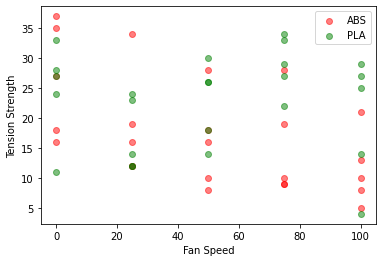

In [12]:
plt.scatter(absm.fan_speed,absm.tension_strenght,color="red",label="ABS",alpha= 0.5)
plt.scatter(pla.fan_speed,pla.tension_strenght,color="green",label="PLA",alpha= 0.5)
plt.xlabel("Fan Speed")
plt.ylabel("Tension Strength")
plt.legend()
plt.show()

As you see, the air circulation not good for ABS

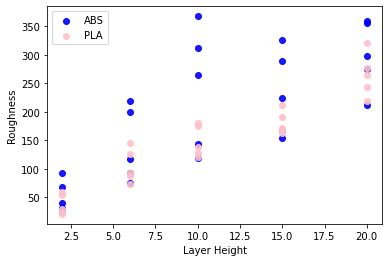

In [13]:
plt.scatter(absm.layer_height,absm.roughness,color="blue",label="ABS",alpha= 0.9)
plt.scatter(pla.layer_height,pla.roughness,color="pink",label="PLA",alpha= 0.9)
plt.xlabel("Layer Height")
plt.ylabel("Roughness")
plt.legend()
plt.show()

You can see as the layer height increases, the roughness increases. But PLA smoother than ABS

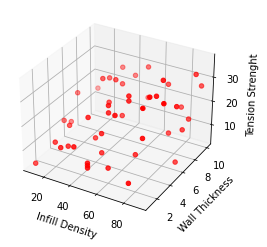

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = data.infill_density
y = data.wall_thickness
z = data.tension_strenght

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Infill Density')
ax.set_ylabel('Wall Thickness')
ax.set_zlabel('Tension Strenght')

plt.show()

In [15]:
import numpy as np

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


 3 nn score: 0.6 
 1 nn score: 0.4666666666666667 
 2 nn score: 0.4666666666666667 
 3 nn score: 0.6 
 4 nn score: 0.6666666666666666 
 5 nn score: 0.7333333333333333 
 6 nn score: 0.6666666666666666 
 7 nn score: 0.7333333333333333 
 8 nn score: 0.6 
 9 nn score: 0.7333333333333333 
 10 nn score: 0.6 
 11 nn score: 0.6 
 12 nn score: 0.6666666666666666 
 13 nn score: 0.7333333333333333 
 14 nn score: 0.6 


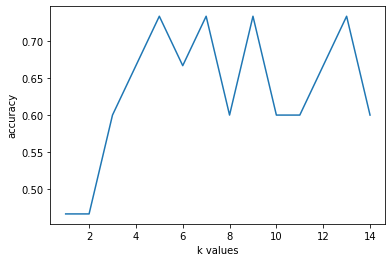

In [16]:
# normalization 
x_norm = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_norm,y_data,test_size = 0.3,random_state=1)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))

score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    print(" {} nn score: {} ".format(each,knn2.score(x_test,y_test)))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()